OASIS INFOBYTE INTERNSHIP

**TASK:3 CAR PRICE PREDICTION WITH MACHINE LEARNING**

BY:*Anushka  Gunjal*  |  Email: anushkagunjal10@gmail.com 

## **Importing the necessary libraries:**

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## **Load The Dataset**

In [50]:
cars_price=pd.read_csv('car data.csv')


In [51]:
print(cars_price)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [52]:
cars_price.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
cars_price.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [54]:
cars_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [55]:
cars_price.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## **Check Each Column**

In [56]:
cars_price.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [57]:
cars_price.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [58]:
cars_price['Car_Name'].unique()
   

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [59]:
cars_price['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [60]:
cars_price['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [61]:
cars_price['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [62]:
cars_price['Present_Price'].unique()

array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

In [63]:
cars_price['Driven_kms'].unique()

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  41678,
        35500,  41442,  25000,   2400,  50000,  45280,  56879,  20000,
        55138,  16200,  44542,  45000,  51439,  54200,  39000,  49998,
        48767, 127000,  10079,  62000,  24524,  46706,  58000,  45780,
        64532,  65000,  25870,  37000, 104707,  40000, 135000,  90000,
        70000,  40534,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  11000,  59000,  88000,  12000,  71000,  56001,  83000,
        36000,  72000, 135154,  80000,  89000,  23000,  38000, 197176,
       142000,  56000,  58242,  75000,  29000,   8700,  50024,   3000,
         1400,   4000,   1200,   4100,  21700,  16500,  18000,   7000,
        35000,  17000,  17500,  33000,  14000,   5400,   5700,  46500,
        11500,   1300,   5000,   3500,    500,  11800,  23500,  16000,
        16600,  32000,  19000,  24000,  31000,  13000,   8000,   4300,
      

In [64]:
cars_price['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [65]:
cars_price['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [66]:
cars_price['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

## **Null & Duplicated Values**

In [67]:
cars_price.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

*This dataset contains no null values ie all the columns have values.*

In [68]:
cars_price.duplicated().sum()

2

*The output '2' indicates that there are two duplicate rows in the DataFrame 'car_price'*

In [69]:
cars_price.drop_duplicates(inplace=True)

Dropped All Duplicates

In [70]:
cars_price.duplicated().sum()

0

## **DataTypes**

In [71]:
cars_price.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

## **checking the distribution of categorical data**

In [72]:
cars_price['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [73]:
cars_price['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [74]:
cars_price['Selling_type'].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [75]:
cars_price['Owner'].value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

## **Encoding The Data**

In [76]:
cars_price['Fuel_Type'].replace({'Petrol':0,'Diesel':1,'CNG':2},inplace=True)

In [77]:
cars_price['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)

In [78]:
cars_price['Selling_type'].replace({'Dealer':0,'Individual':1},inplace=True)

In [79]:
cars_price.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Convert Selling_type to Seller_Type

In [80]:
##Renaming 'Selling_type' column to 'Seller_Type' for a better understanding :
cars_price.rename(columns = {'Selling_type':'Seller_Type'}, inplace = True)

##  **Create a Heat Map**

<Axes: >

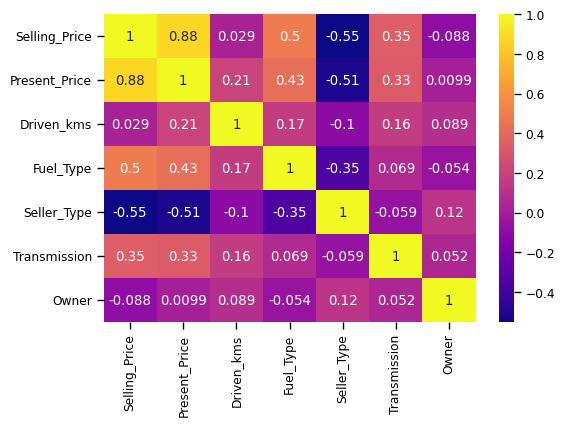

In [81]:
map = cars_price[["Selling_Price", "Present_Price", "Driven_kms", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]]
map = map.corr()

plt.figure(figsize = (6,4))
sns.set_context('paper', font_scale=1)
sns.heatmap(data = map, annot = True, cmap='plasma')

## **Splitting The Data and Target**

In [82]:
X = cars_price.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = cars_price['Selling_Price']

In [83]:
X.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [84]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## **Splitting Training and Testing data**

X train : All the training data

X test : All the testing data

Y train : All the prices of X train

Y test : All the prices of X test

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## **Model Training**

### **1. Linear Regression**

In [86]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

#### **Model Evaluation**

##### **A. Evaluation on Training Data**

In [87]:
# Predicting on Training data:
training_data_prediction = lin_reg.predict(X_train)

# R Squared error:
score_of_error = metrics.r2_score(Y_train, training_data_prediction)
print(f"The R square error in this case is : {score_of_error}")

The R square error in this case is : 0.876802966469725


**Actual VS Prdeicted Values**

In [88]:
# Creating a DataFrame for plotting
plot_data = {'Actual Price': Y_train, 'Predicted Price': training_data_prediction}
df = pd.DataFrame(plot_data)

# Creating a scatter plot
fig = px.scatter(df, x='Actual Price', y='Predicted Price', color=df.index,
                 title='Actual Prices vs Predicted Prices',
                 labels={'Actual Price': 'Actual Price', 'Predicted Price': 'Predicted Price'})
fig.show()

*It is observed that the values produced by our Machine Learning model are very close to our original sold prices.*

##### **B. Evaluation on Testing Data**

In [91]:
# Predicting on Testing data:
test_data_prediction = lin_reg.predict(X_test)

# R Squared Error:
score_of_error = metrics.r2_score(Y_test, test_data_prediction)
print(f"The R Squared error in this case is: {score_of_error}")

The R Squared error in this case is: 0.8561865067080043


In [92]:
# Creating a DataFrame for plotting
plot_data_test = {'Actual Price': Y_test, 'Predicted Price': test_data_prediction}
df_test = pd.DataFrame(plot_data_test)

# Creating a scatter plot
fig_test = px.scatter(df_test, x='Actual Price', y='Predicted Price', color=df_test.index,
                      title='Actual Prices vs Predicted Prices (Test Set)',
                      labels={'Actual Price': 'Actual Price', 'Predicted Price': 'Predicted Price'})
fig_test.show()


### **Lasso Regression**

In [96]:
lass_reg = Lasso()
lass_reg.fit(X_train, Y_train)

Lasso()

#### **Model Evaluation**


##### **Evaluation on Training Data**

In [ ]:
training_data_prediction = lass_reg.predict(X_train)

# R Squared Error-
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(f"The R Squared Error in this case is : {error_score}")

In [98]:
# Creating a DataFrame for plotting
plot_data = {'Actual Price': Y_train, 'Predicted Price': training_data_prediction}
df = pd.DataFrame(plot_data)

# Creating a scatter plot
fig = px.scatter(df, x='Actual Price', y='Predicted Price', color=df.index,
                 title='Actual Prices vs Predicted Prices',
                 labels={'Actual Price': 'Actual Price', 'Predicted Price': 'Predicted Price'})
fig.show()

##### **Evaluation on Testing Data**

In [ ]:
# Predicting on Testing data:
test_data_prediction = lass_reg.predict(X_test)

# R Squared Error:
error = metrics.r2_score(Y_test, test_data_prediction)
print(f"The R Squared error in this case is: {error}")

The R Squared error in this case is: 0.7931955660079392


In [99]:
# Creating a DataFrame for plotting
plot_data = {'Actual Price': Y_train, 'Predicted Price': training_data_prediction}
df = pd.DataFrame(plot_data)

# Creating a scatter plot
fig = px.scatter(df, x='Actual Price', y='Predicted Price', color=df.index,
                 title='Actual Prices vs Predicted Prices',
                 labels={'Actual Price': 'Actual Price', 'Predicted Price': 'Predicted Price'})
fig.show()

**Conclusion :** 

The Linear Regression model performed better than the Lasso Regression model in predicting car prices. The R-squared error for the Linear Regression model was higher on both the training and testing datasets, indicating a better fit. The scatter plots for both models showed that the predicted prices were close to the actual prices, but the Linear Regression model had a tighter clustering around the line of perfect prediction. This suggests that the Linear Regression model is more accurate and reliable for this dataset.